# PDS ASSIGNMENT


Importing required libraries

In [ ]:
import pandas as pd
import numpy as np
from matplotlib.pyplot import subplots
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv("/content/StudentsPerformance.csv")

In [ ]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [ ]:
data.isnull()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
995,False,False,False,False,False,False,False,False
996,False,False,False,False,False,False,False,False
997,False,False,False,False,False,False,False,False
998,False,False,False,False,False,False,False,False


In [ ]:
data.count()

gender                         1000
race/ethnicity                 1000
parental level of education    1000
lunch                          1000
test preparation course        1000
math score                     1000
reading score                  1000
writing score                  1000
dtype: int64

# DATA VISUALIZATIONS

<Axes: title={'center': 'Scatterplot: gender vs reading score'}, xlabel='gender', ylabel='reading score'>

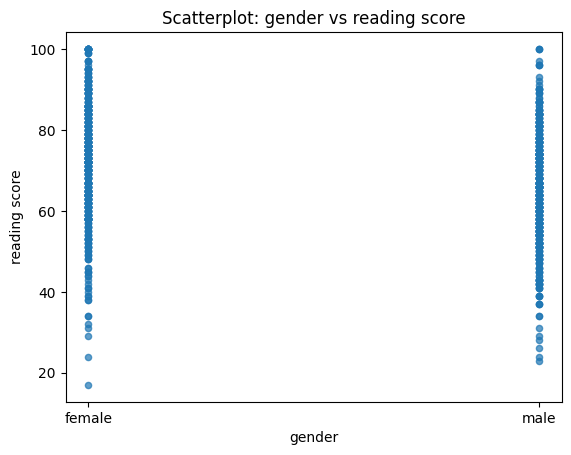

In [ ]:
data.plot.scatter(x='gender', y='reading score', title='Scatterplot: gender vs reading score', alpha=0.7)

<Axes: title={'center': 'Scatterplot: gender vs math score'}, xlabel='gender', ylabel='math score'>

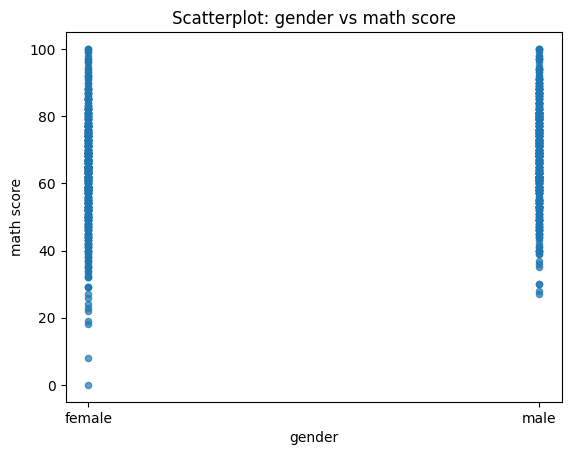

In [ ]:
data.plot.scatter(x='gender', y='math score', title='Scatterplot: gender vs math score', alpha=0.7)

<Axes: title={'center': 'Scatterplot: gender vs writing score'}, xlabel='gender', ylabel='writing score'>

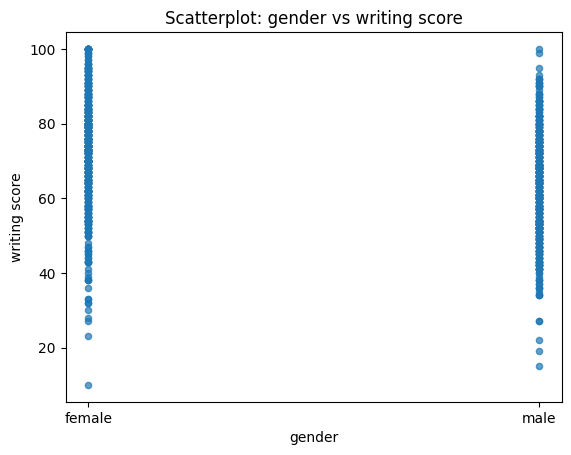

In [ ]:
data.plot.scatter(x='gender', y='writing score', title='Scatterplot: gender vs writing score', alpha=0.7)

<ipython-input-12-3a4840c29e2a>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  average_scores = data.groupby('parental level of education').mean()


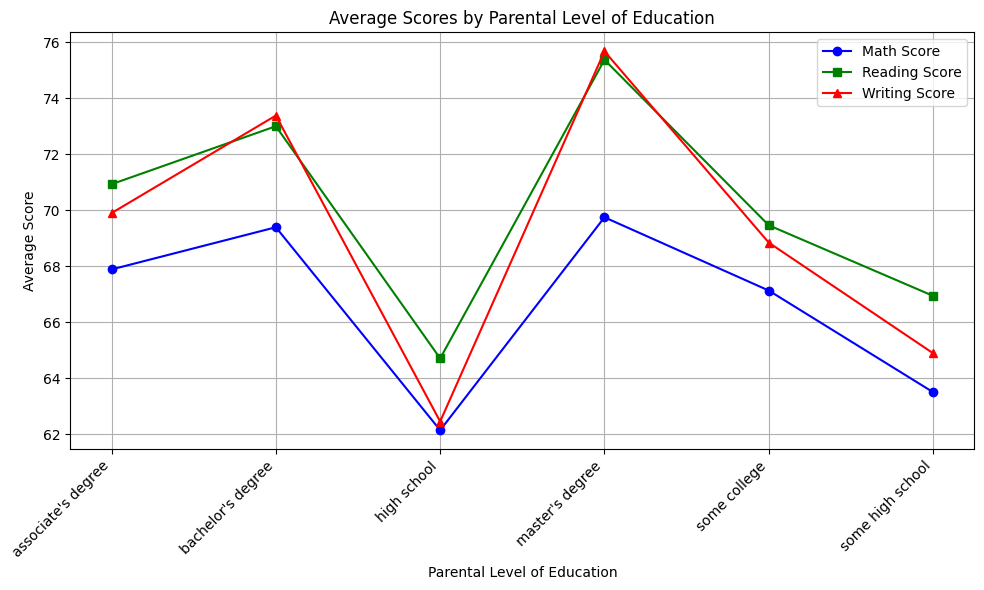

In [ ]:
average_scores = data.groupby('parental level of education').mean()
plt.figure(figsize=(10, 6))
plt.plot(average_scores.index, average_scores['math score'], marker='o', label='Math Score', color='blue')
plt.plot(average_scores.index, average_scores['reading score'], marker='s', label='Reading Score', color='green')
plt.plot(average_scores.index, average_scores['writing score'], marker='^', label='Writing Score', color='red')
plt.title('Average Scores by Parental Level of Education')
plt.xlabel('Parental Level of Education')
plt.ylabel('Average Score')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


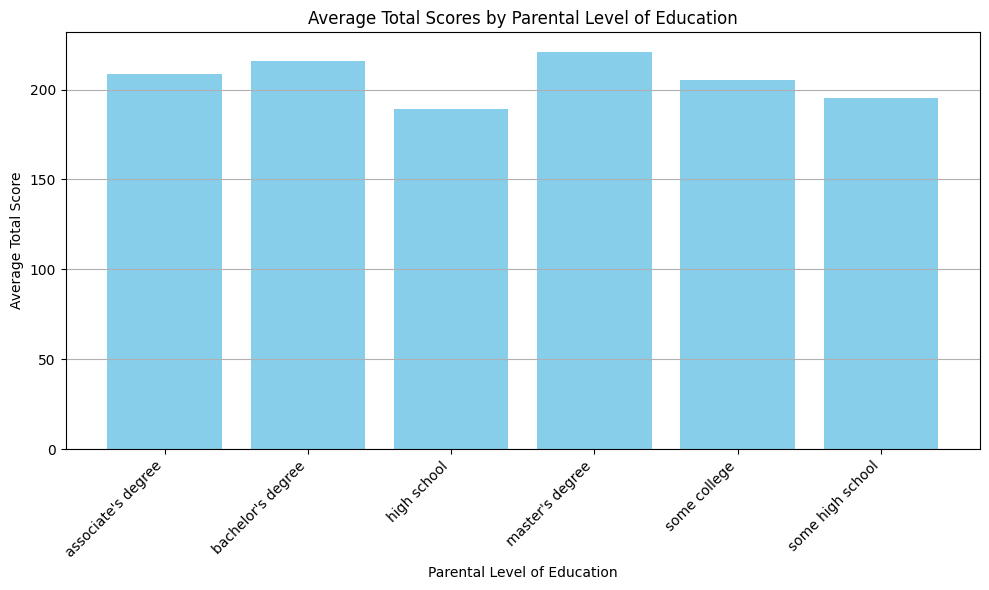

In [ ]:

data['total score'] = data['math score'] + data['reading score'] + data['writing score']
average_total_score = data.groupby('parental level of education')['total score'].mean().reset_index()
plt.figure(figsize=(10, 6))
plt.bar(average_total_score['parental level of education'], average_total_score['total score'], color='skyblue')
plt.title('Average Total Scores by Parental Level of Education')
plt.xlabel('Parental Level of Education')
plt.ylabel('Average Total Score')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

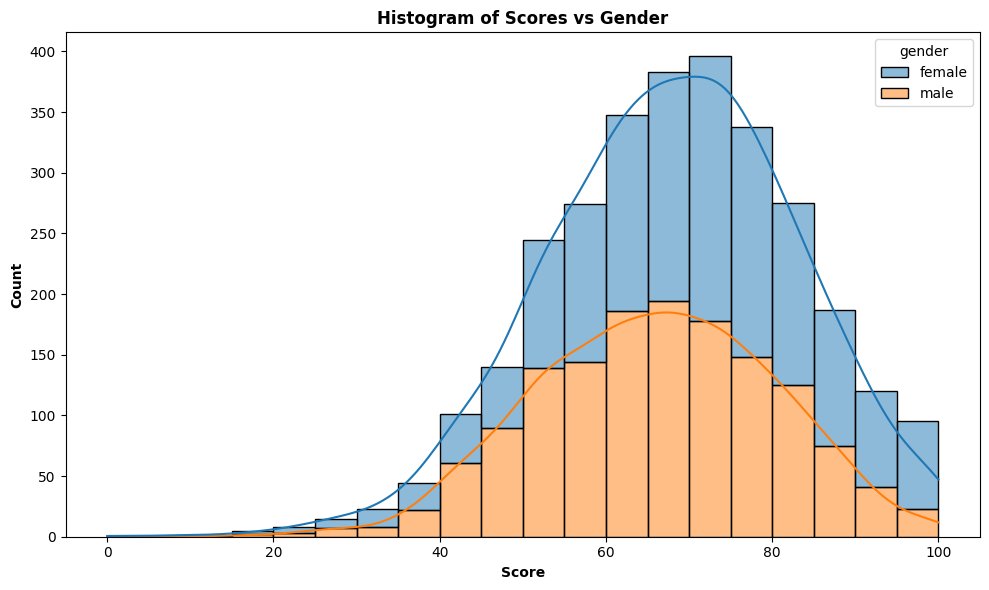

In [ ]:
melted_data_gender = data.melt(id_vars='gender', value_vars=['math score', 'reading score', 'writing score'], var_name='score_type')
plt.figure(figsize=(10, 6))
sns.histplot(data=melted_data_gender, x='value', hue='gender', multiple="stack", bins=20, kde=True)
plt.xlabel('Score', fontweight='bold')
plt.ylabel('Count', fontweight='bold')
plt.title('Histogram of Scores vs Gender', fontweight='bold')
plt.tight_layout()
plt.show()


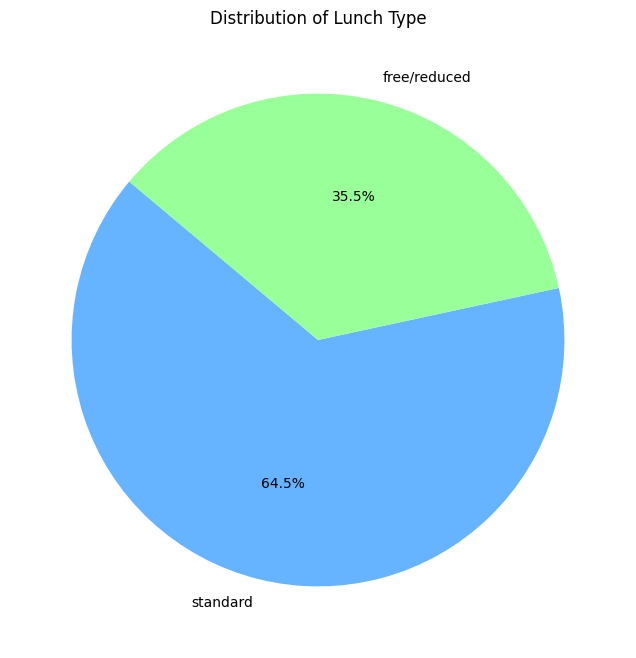

In [ ]:
plt.figure(figsize=(8, 8))
labels = data['lunch'].value_counts().index
sizes = data['lunch'].value_counts().values
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=['#66b3ff','#99ff99'])
plt.title('Distribution of Lunch Type')
plt.show()

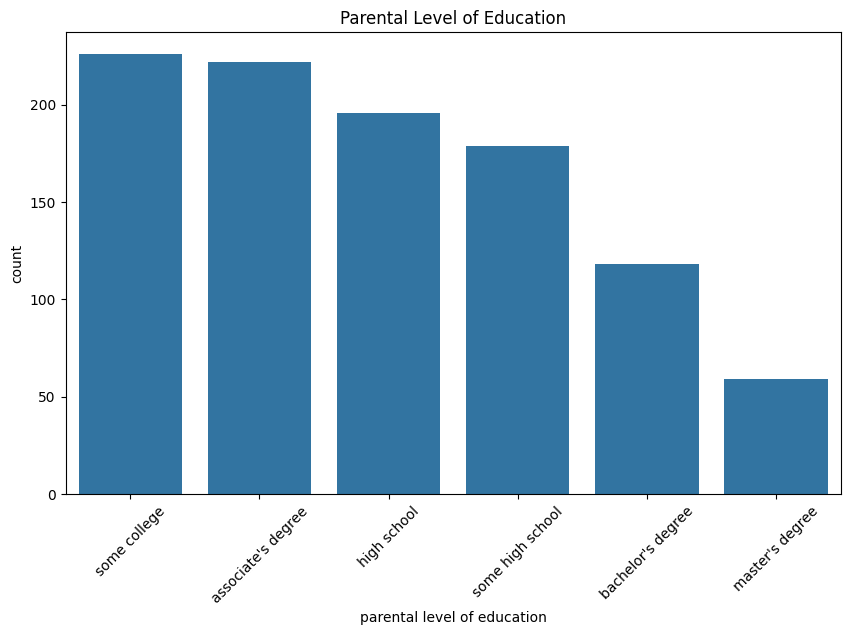

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='parental level of education', data=data, order=data['parental level of education'].value_counts().index)
plt.xticks(rotation=45)
plt.title('Parental Level of Education')
plt.show()

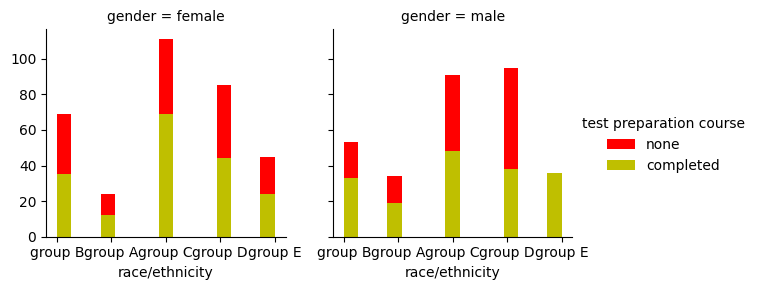

In [ ]:
graph = sns.FacetGrid(data, col ='gender',hue_kws={'color': ['r', 'y']}, hue ='test preparation course') # map the above form facetgrid with some attributes
graph.map(plt.hist, 'race/ethnicity', bins = 15, color ='orange').add_legend() # show the object
